# Predicting house prices in California
The main idea of this task is to demonstrate dimensionality reduction (PCA), Preprocessing /Scaling, Categorical Encoding (Dummy / One-Hot), Binning (Grouping, Aggregating), Clustering (k-means), and Feature selection.

At the end of the task, I did a feature selection, in which I made a combination of features and I got a better score. For sure there were many other ways to enhance the score using the same methods in this task but just like I mentioned it is not the main idea of this task.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('housing.csv')
df = df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
df.shape

(20433, 10)

In [95]:
df = df.sample(frac=1, random_state=2) # sampling the dataframe and shuffle all the rows.

train_df = df[:17000]
train_df = train_df.reset_index(drop=True)

test_df = df[17000:]
test_df = test_df.reset_index(drop=True)

train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
16996,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
16997,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
16998,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


In [96]:
y_train = train_df['median_house_value'].to_numpy()  # converting it to numpy array
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((17000,), (3433,))

In [97]:
# Get error of baseline model that uses the average median_house_value in train_df

from sklearn.metrics import mean_absolute_error

avg_median_house_value = train_df['median_house_value'].mean()
baseline_pred = [avg_median_house_value] * len(test_df)

mean_absolute_error(baseline_pred, y_test)

90952.86688447764

## Dimensionality Reduction (PCA)

In [98]:
# Observe correlation between total_rooms,total_bedrooms, and households

train_df[['total_rooms', 'total_bedrooms', 'households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


In [99]:
# Get X_train_3 which has total_rooms,total_bedrooms, and households as inputs

X_train_3 = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()
X_train_3.shape

(17000, 3)

In [100]:
# Get X_test_3 which has total_rooms,total_bedrooms, and households as inputs

X_test_3 = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()
X_test_3.shape

(3433, 3)

In [101]:
# Get error of random forest training

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3, y_train)
forest_pred = forest.predict(X_test_3)
mean_absolute_error(y_test, forest_pred)

82140.62236871265

In [102]:
# Train PCA with 2-feature output

from sklearn.decomposition import PCA

pca = PCA(n_components=2) # we have 3 columns in X_train_3 but we will get only 2 as n_components=2
pca = pca.fit(X_train_3)

pca

PCA(n_components=2)

In [103]:
X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_train_pca.shape, X_test_pca.shape

((17000, 2), (3433, 2))

In [104]:
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_pca, y_train)
forest_pca_pred = forest_pca.predict(X_test_pca)

mean_absolute_error(y_test, forest_pca_pred)

79371.4327487026

## Preprocessing / Scaling

In [105]:
X_train_3

array([[2781.,  574.,  519.],
       [1233.,  214.,  199.],
       [4166.,  756.,  743.],
       ...,
       [1895.,  424.,  417.],
       [3354.,  659.,  648.],
       [1027.,  258.,  248.]])

(array([1.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00, 9.0000e+00,
        1.5000e+01, 7.8000e+01, 3.0200e+02, 3.5140e+03, 1.3073e+04]),
 array([0.54258999, 0.58773511, 0.63288023, 0.67802535, 0.72317047,
        0.76831559, 0.81346071, 0.85860583, 0.90375095, 0.94889607,
        0.99404119]),
 <BarContainer object of 10 artists>)

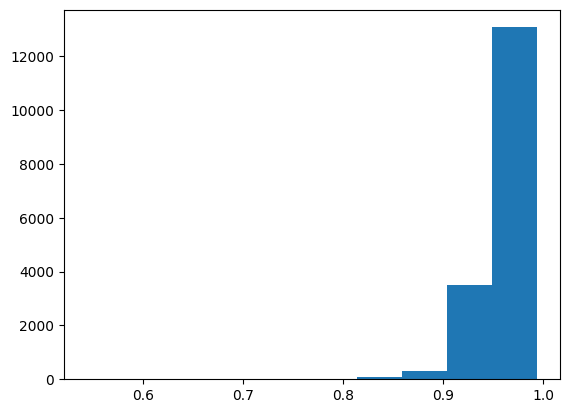

In [106]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scaler = Normalizer().fit(X_train_3)
X_train_3_scaled = scaler.transform(X_train_3)

plt.hist(X_train_3_scaled[:, 0])

In [107]:
X_test_3_scaled = scaler.transform(X_test_3)
X_test_3_scaled.shape

(3433, 3)

In [108]:
forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3_scaled, y_train)
forest_scaled_pred = forest_scaled.predict(X_test_3_scaled)

mean_absolute_error(y_test, forest_scaled_pred)

77634.88348392995

In [109]:
# Create a pipeline of Normalizer -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

forest_scaled_pca_pipe = Pipeline(steps=[('scaler', Normalizer()),
                                        ('PCA', PCA(n_components=2)),
                                        ('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))])
forest_scaled_pca_pipe

Pipeline(steps=[('scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [110]:
forest_scaled_pca_pipe.fit(X_train_3, y_train)
forest_scaled_pca_pipe_pred = forest_scaled_pca_pipe.predict(X_test_3)

mean_absolute_error(y_test, forest_scaled_pca_pipe_pred)

77381.74623087748

## Categorical Encoding (Dummy / One-Hot)

In [111]:
train_dummies = pd.get_dummies(train_df['ocean_proximity'])
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,True,False,False,False
2,True,False,False,False,False
3,False,False,False,True,False
4,False,True,False,False,False


In [112]:
train_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7522
INLAND        5408
NEAR OCEAN    2172
NEAR BAY      1895
ISLAND           3
Name: count, dtype: int64

In [113]:
train_df = pd.concat([train_df, train_dummies], axis=1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,False,False,False,True,False
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,False,True,False,False,False
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,True,False,False,False,False
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,False,False,False,True,False
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,False,True,False,False,False


In [114]:
train_df.drop('ISLAND', inplace=True, axis=1) # because it has only 3 values
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,False,False,True,False
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,False,True,False,False
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,True,False,False,False
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,False,False,True,False
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,False,True,False,False


In [115]:
test_dummies = pd.get_dummies(test_df['ocean_proximity'])
test_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [116]:
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.drop('ISLAND', inplace=True, axis=1)

test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-118.07,33.87,28.0,2399.0,436.0,1613.0,429.0,3.6339,220100.0,<1H OCEAN,True,False,False,False
1,-118.26,34.02,40.0,1259.0,362.0,1499.0,327.0,1.8382,126400.0,<1H OCEAN,True,False,False,False
2,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,500001.0,<1H OCEAN,True,False,False,False
3,-120.04,36.95,36.0,1528.0,347.0,1334.0,304.0,1.3594,48300.0,INLAND,False,True,False,False
4,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,181300.0,<1H OCEAN,True,False,False,False


In [117]:
X_train_dummies = train_df.to_numpy()[:, -4:]
X_train_dummies.shape

(17000, 4)

In [118]:
X_test_dummies = test_df.to_numpy()[:, -4:]
X_test_dummies.shape

(3433, 4)

In [119]:
from sklearn.linear_model import LinearRegression

linear_dummy = LinearRegression().fit(X_train_dummies, y_train)
linear_dummy_pred = linear_dummy.predict(X_test_dummies)

mean_absolute_error(y_test, linear_dummy_pred)

77095.0289334857

## Binning (Grouping, Aggregating)

<Axes: >

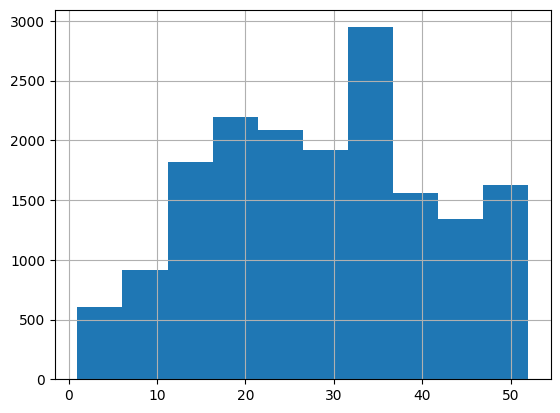

In [120]:
train_df['housing_median_age'].hist()

In [121]:
train_df['median_age_less_30'] = (train_df['housing_median_age'] < 30).astype(int)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_age_less_30
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,False,False,True,False,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,False,True,False,False,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,True,False,False,False,1
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,False,False,True,False,1
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,False,True,False,False,1


In [122]:
X_train_median_age = train_df['median_age_less_30'].to_numpy().reshape(-1, 1)
X_train_median_age.shape

(17000, 1)

In [123]:
test_df['median_age_less_30'] = (test_df['housing_median_age'] < 30).astype(int)
X_test_median_age = test_df['median_age_less_30'].to_numpy().reshape(-1, 1)
X_test_median_age.shape

(3433, 1)

In [124]:
linear_median_age = LinearRegression().fit(X_train_median_age, y_train)
linear_median_age_pred = linear_median_age.predict(X_test_median_age)

mean_absolute_error(y_test, linear_median_age_pred)

90794.78827572097

## Clustering

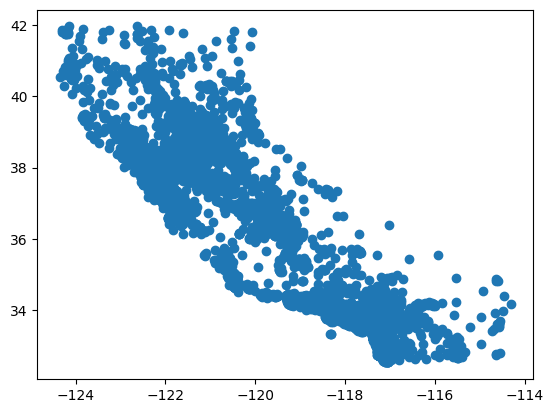

In [125]:
# Plot map of California

plt.scatter(train_df['longitude'], train_df['latitude'])

In [126]:
from sklearn.cluster import KMeans

X_train_lat = train_df[['longitude', 'latitude']].to_numpy()
kmeans = KMeans(n_clusters=7).fit(X_train_lat)
kmeans.labels_

array([1, 2, 4, ..., 6, 4, 4])

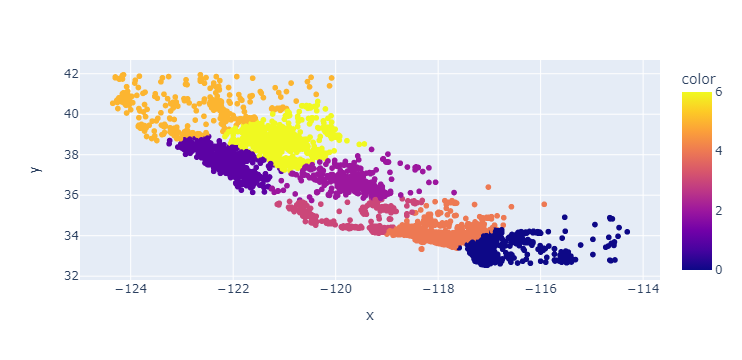

In [127]:
import plotly.express as px

px.scatter(x=train_df['longitude'], y=train_df['latitude'], color=kmeans.labels_)

In [128]:
X_train_clustering = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy()
X_train_clustering.shape

(17000, 7)

In [129]:
X_test_lat = test_df[['longitude', 'latitude']].to_numpy()
X_test_clustering = pd.get_dummies(pd.Series(kmeans.predict(X_test_lat))).to_numpy()
X_test_clustering.shape

(3433, 7)

In [130]:
linear_clustering = LinearRegression().fit(X_train_clustering, y_train)
linear_clustering_pred = linear_clustering.predict(X_test_clustering)

mean_absolute_error(linear_clustering_pred, y_test)

76014.41101077775

## Feature selection (Combination of features)

In [131]:
X_train_clustering.shape, X_train_3_scaled.shape, X_train_dummies.shape

((17000, 7), (17000, 3), (17000, 4))

In [132]:
X_train_full = np.concatenate([X_train_clustering, X_train_3_scaled, X_train_dummies], axis=1)
X_train_full.shape

(17000, 14)

In [133]:
X_test_full = np.concatenate([X_test_clustering, X_test_3_scaled, X_test_dummies], axis=1)
X_test_full.shape

(3433, 14)

In [134]:
forest_all = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_full, y_train)
forest_all_pred = forest_all.predict(X_test_full)

mean_absolute_error(forest_all_pred, y_test)

59769.89149102363